In [30]:
import mdf_iter               # MDF4 데이터 불러오는 라이브러리
import canedge_browser        # 로컬 또는 S3에 저장된 데이터 가져오는 라이브러리
import can_decoder            # 데이터를 복호화하는 라이브러리
import numpy as np
import pandas as pd           # 데이터분석 라이브러리
from datetime import datetime, timezone  # 날짜와 시간 데이터를 가져올 수 있는 파이썬 라이브러리
from utils import setup_fs, load_dbc_files, restructure_data, add_custom_sig, ProcessData # 폴더 내 위치한 Custom 라이브러리

In [31]:
# specify devices to process (from local/S3), DBC files and start time
devices = ["LOG/958D2219"]
dbc_paths = ["dbc_files/CSS-Electronics-SAE-J1939-DEMO.dbc"]


# s3 또는 로컬에 저장한 파일을 불러옵니다. 
# 만약 s3에 저장한 경우라면, s3=True를 입력합니다.

# 시작시간
start = datetime(year=2020, month=1, day=13, hour=0, tzinfo=timezone.utc)

In [32]:
# setup filesystem (local/S3), load DBC files and list log files for processing
fs = setup_fs(s3=False, key="", secret="", endpoint="")


In [33]:
# 리스트형태로 입력한 dbc 파일경로를 받아 list를 생성합니다
db_list = load_dbc_files(dbc_paths)
# canedge_browser.get_log_files는 조건에 맞는 로그 파일 경로를 List로 반환합니다.
log_files = canedge_browser.get_log_files(fs, devices, start_date=start)
print(f"Found a total of {len(log_files)} log files")

print(db_list)
print(log_files)


Found a total of 2 log files
['/LOG/958D2219/00002501/00002081.MF4', '/LOG/958D2219/00002501/00002082.MF4']


In [34]:
proc = ProcessData(fs, db_list, signals=[])

# 데이터 프레임을 먼저만든뒤
df_phys_all = pd.DataFrame()


In [44]:
% load, DBC decode and print MF4 log files
for log_file in log_files:
   df_raw,df_id = proc.get_raw_data(log_file)
   df_phys = proc.extract_phys(df_raw)
   print(df_phys)


                                     CAN ID    PGN  Source Address  \
TimeStamp                                                            
2020-01-13 14:47:09.816750+00:00  217056256  61444               0   
2020-01-13 14:47:09.826750+00:00  217056256  61444               0   
2020-01-13 14:47:09.836800+00:00  217056256  61444               0   
2020-01-13 14:47:09.846750+00:00  217056256  61444               0   
2020-01-13 14:47:09.856850+00:00  217056256  61444               0   
...                                     ...    ...             ...   
2020-01-13 14:50:25.620550+00:00  217056256  61444               0   
2020-01-13 14:50:25.629750+00:00  217056256  61444               0   
2020-01-13 14:50:25.639750+00:00  217056256  61444               0   
2020-01-13 14:50:25.649750+00:00  217056256  61444               0   
2020-01-13 14:50:25.659800+00:00  217056256  61444               0   

                                       Signal  Raw Value  Physical Value  
TimeStamp     

In [35]:
# 로그파일 리스트의 데이터를 불러와 데이터프레임에 append
for log_file in log_files:
    # .get_raw_data 는 df_raw 값과 device_id 값 리턴
    df_raw,device_id = proc.get_raw_data(log_file)
    df_phys = proc.extract_phys(df_raw)
    proc.print_log_summary(device_id,log_file,df_phys)
    df_phys_all = df_phys_all.append(df_phys)

    


--------------- 
Device: 958D2219 | Log file: /00002501/00002081.MF4 [Extracted 21542 decoded frames]
Period: 2020-01-13 14:47:09.816750+00:00 - 2020-01-13 14:50:25.659800+00:00


--------------- 
Device: 958D2219 | Log file: /00002501/00002082.MF4 [Extracted 21542 decoded frames]
Period: 2020-01-13 14:50:25.670250+00:00 - 2020-01-13 14:53:41.502950+00:00



In [36]:
# df.info 는 함수의 전체정보를 요약해서 출력합니다.
df_phys_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43084 entries, 2020-01-13 14:47:09.816750+00:00 to 2020-01-13 14:53:41.502950+00:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CAN ID          43084 non-null  uint32 
 1   PGN             43084 non-null  int64  
 2   Source Address  43084 non-null  uint32 
 3   Signal          43084 non-null  object 
 4   Raw Value       43084 non-null  uint16 
 5   Physical Value  43084 non-null  float64
dtypes: float64(1), int64(1), object(1), uint16(1), uint32(2)
memory usage: 1.7+ MB


In [37]:
df_phys_all.head()

,CAN ID,PGN,Source Address,Signal,Raw Value,Physical Value
TimeStamp,,,,,,
2020-01-13 14:47:09.816750+00:00,217056256,61444,0,EngineSpeed,13596,1699.500
2020-01-13 14:47:09.826750+00:00,217056256,61444,0,EngineSpeed,13554,1694.250
2020-01-13 14:47:09.836800+00:00,217056256,61444,0,EngineSpeed,13495,1686.875
2020-01-13 14:47:09.846750+00:00,217056256,61444,0,EngineSpeed,13418,1677.250
2020-01-13 14:47:09.856850+00:00,217056256,61444,0,EngineSpeed,13331,1666.375


In [38]:
def ratio(s1,s2):
    return s2/s1 if s1 else np.nan

In [39]:
df_phys_all = add_custom_sig(df_phys_all, "WheelBasedVehicleSpeed", "EngineSpeed", ratio, "RatioRpmSpeed")

In [40]:
df_phys_all.tail()


,CAN ID,PGN,Source Address,Signal,Raw Value,Physical Value
TimeStamp,,,,,,
2020-01-13 14:53:41.472850+00:00,NaN,NaN,NaN,RatioRpmSpeed,NaN,17.676361
2020-01-13 14:53:41.483450+00:00,NaN,NaN,NaN,RatioRpmSpeed,NaN,17.676361
2020-01-13 14:53:41.493050+00:00,NaN,NaN,NaN,RatioRpmSpeed,NaN,17.659955
2020-01-13 14:53:41.494800+00:00,NaN,NaN,NaN,RatioRpmSpeed,NaN,17.668190
2020-01-13 14:53:41.502950+00:00,NaN,NaN,NaN,RatioRpmSpeed,NaN,17.662221


In [41]:
# 위의 데이터프레임을 재구조화 후 csv 파일로내보내기
df_phys_join = restructure_data(df_phys=df_phys_all, res="1S")
df_phys_join
# df_phys_join.to_csv("output_joined.csv")



,EngineSpeed,WheelBasedVehicleSpeed
TimeStamp,,
2020-01-13 14:47:10+00:00,1537.875,19.320312
2020-01-13 14:47:11+00:00,1085.000,20.648438
2020-01-13 14:47:12+00:00,1239.875,19.476562
2020-01-13 14:47:13+00:00,1399.625,21.859375
2020-01-13 14:47:14+00:00,1583.625,24.773438
...,...,...
2020-01-13 14:53:37+00:00,1478.375,83.000000
2020-01-13 14:53:38+00:00,1464.125,82.867188
2020-01-13 14:53:39+00:00,1455.250,84.179688


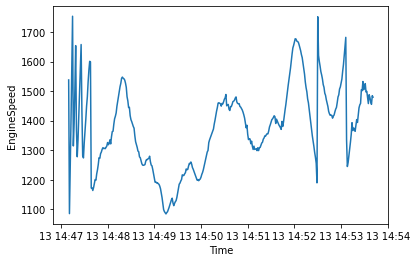

In [42]:
# 엔진속도를 시각화 
import matplotlib.pyplot as plt

plt.plot(df_phys_join["EngineSpeed"])
plt.xlabel("Time")
plt.ylabel("EngineSpeed")
# plt.legend("E")
plt.show()

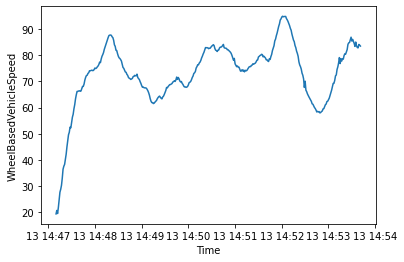

In [43]:
# WheelBasedVehicleSpeed 시각화
plt.plot(df_phys_join["WheelBasedVehicleSpeed"])
plt.xlabel("Time")
plt.ylabel("WheelBasedVehicleSpeed")
# plt.legend("E")
plt.show()